# Introduction
In this demo, you can take pictures using the camera in Pynq and then using YOLO to detect objects(car & people) in the images.

# DPU
The Xilinx® Deep Learning Processor Unit (DPU) is a programmable engine optimized for convolutional
neural networks. The unit includes a high performance scheduler module, a hybrid computing array
module, an instruction fetch unit module, and a global memory pool module. The DPU uses a
specialized instruction set, which allows for the efficient implementation of many convolutional neural
networks. Some examples of convolutional neural networks which have been deployed include VGG,
ResNet, GoogLeNet, YOLO, SSD, MobileNet, FPN, and many others.
The DPU IP can be implemented in the programmable logic (PL) of the selected Zynq®-7000 SoC or
Zynq UltraScale+™ MPSoC devices with direct connections to the processing system (PS). The DPU
requires instructions to implement a neural network and accessible memory locations for input images
as well as temporary and output data. A program running on the application processing unit (APU) is
also required to service interrupts and coordinate data transfers

# YOLO
How does YOLO work ?
We can think of an object detector as a combination of a object locator and an object recognizer.

In traditional computer vision approaches, a sliding window was used to look for objects at different locations and scales. Because this was such an expensive operation, the aspect ratio of the object was usually assumed to be fixed.

Early Deep Learning based object detection algorithms like the R-CNN and Fast R-CNN used a method called Selective Search to narrow down the number of bounding boxes that the algorithm had to test.

Another approach called Overfeat involved scanning the image at multiple scales using sliding windows-like mechanisms done convolutionally.

This was followed by Faster R-CNN that used a Region Proposal Network (RPN) for identifying bounding boxes that needed to be tested. By clever design the features extracted for recognizing objects, were also used by the RPN for proposing potential bounding boxes thus saving a lot of computation.

YOLO on the other hand approaches the object detection problem in a completely different way. It forwards the whole image only once through the network. SSD is another object detection algorithm that forwards the image once though a deep learning network, but YOLOv3 is much faster than SSD while achieving very comparable accuracy. 

## Change the orig_img_path below to specify the place where you want to save your picture.

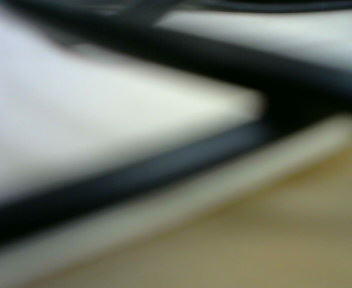

In [34]:
from PIL import Image as PIL_Image

orig_img_path = './image/a.png'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null

img = PIL_Image.open(orig_img_path)
img

## Change the a.jpg below to specify which picture is the target one of YOLO.

./yolo ./image/berlin_000009_000019_leftImg8bit_512_256.png s
(0, 'setimage: 93437 us\nruntask: 52267 us\ndeal: 79972 us')


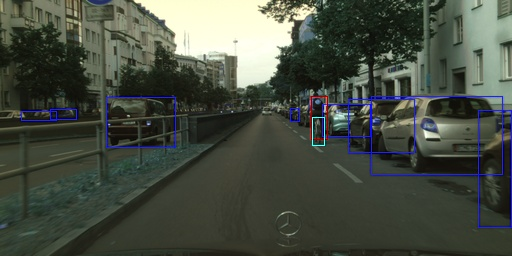

In [36]:
import glob
import subprocess
from IPython import display
import time
import cv2
import numpy
import base64
def arrayShow(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return display.Image(data=encoded.decode('ascii'))

images = glob.glob("./image/*png")
for i in images:
    display.clear_output(wait=True)
    cmd = "./yolo "+i+" s"
    print(cmd)
    print(subprocess.getstatusoutput(cmd))
    showImage = arrayShow(numpy.asarray(PIL_Image.open('./show.jpg')))
    display.display(showImage)
    time.sleep(2)
    